# ASSESSMENT 3

## Implement the K-Means Clustering and Principal Component Analysis algorithms from scratch in Python using Numpy and Pandas and Matplotlib for visualization.

## The algorithm must be implemented as a function with arguments (dataset). Usage of any library that has an implementation is forbidden. 

## The last column, Species needs to be removed before giving it as argument to the function. The column needs to stored in another variable for future comparison.

## For Principal Component Analysis, the data (without Species column) must be plotted in the first three eigenvectors and the eigenvalues for the corresponding values should also be noted. 

## In clustering, two plots one showing the output of the cluster and one showing actual species should be displayed. 

## The code must be uploaded to the portal and GitHub and be in Python Notebook format (.ipynb file). The GitHub link is to be attached. The repository has to be open.

## Evaluation will be done on the code formatting, the final accuracy results, and small explanations of any data preprocessing done (data preprocessing and visualization has bonus points). The explanations must also be included in the same python notebook which can be done using markdown cells.

### Load the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris Dataset.csv')

In [3]:
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [7]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [8]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Preprocessing the Data

In [9]:
y_true = df['Species']
X = df.drop(['Species'], axis=1)

In [10]:
# Standardizing the data
def standardize(X):
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

In [11]:
X_std = standardize(X).values

### Designing the k Means Algorithm

In [12]:
def initialize_centroids(X, k):
    np.random.seed(42)
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(X, labels, k):
    return np.array([X[labels == i].mean(axis=0) for i in range(k)])

def k_means(X, k=3, max_iters=100):
    centroids = initialize_centroids(X, k)
    
    for i in range(max_iters):
        labels = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, labels, k)
        
        if np.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

### Finding the best value of k using Elbow method

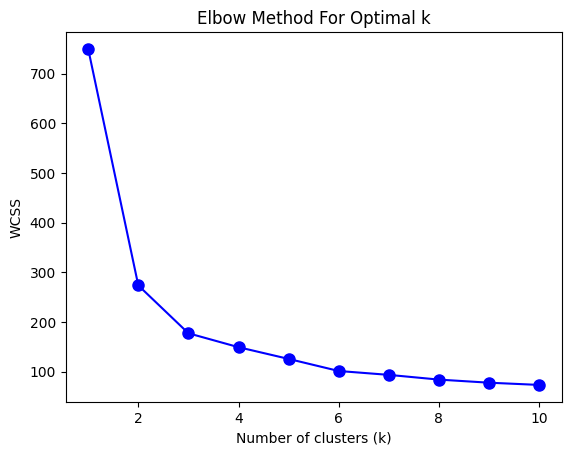

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def calculate_wcss(X, labels, centroids):
    wcss = 0
    for i in range(len(centroids)):
        cluster_points = X[labels == i]
        distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
        wcss += np.sum(distances**2)
    return wcss

wcss_values = []
K_range = range(1, 11)  # Check k from 1 to 10

for k in K_range:
    labels, centroids = k_means(X_std, k=k)
    wcss = calculate_wcss(X_std, labels, centroids)
    wcss_values.append(wcss)

plt.plot(K_range, wcss_values, 'bo-', markersize=8)
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method For Optimal k')
plt.show()

### Visualizing the results

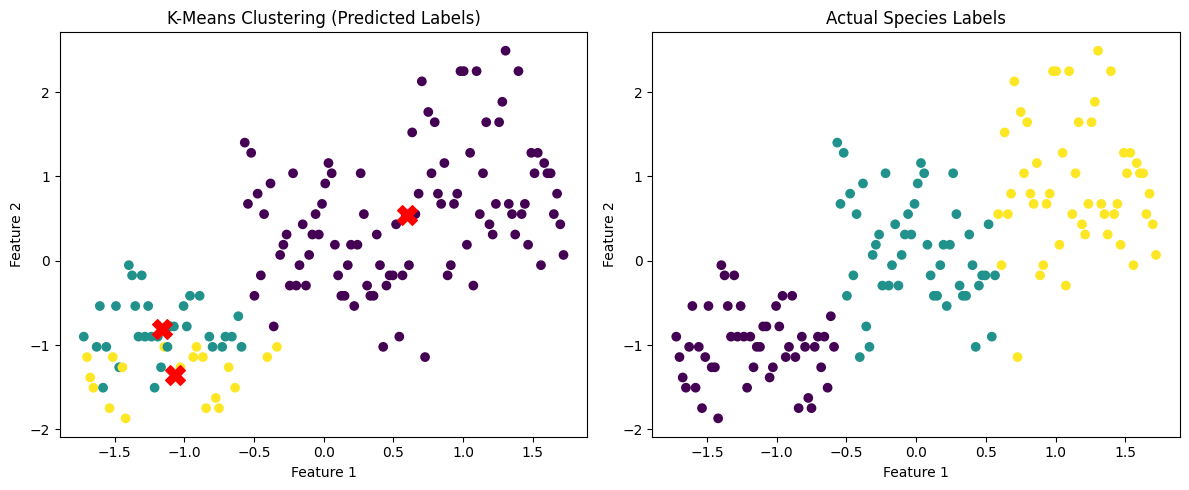

In [41]:
labels, centroids = k_means(X_std, k=3)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(X_std[:, 0], X_std[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200)
plt.title('K-Means Clustering (Predicted Labels)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.subplot(1, 2, 2)
plt.scatter(X_std[:, 0], X_std[:, 1], c=y_numeric, cmap='viridis')
plt.title('Actual Species Labels')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.tight_layout()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_std, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.4525293949783037


### Implementing Principle Component Analysis

In [19]:
def pca(X, n_components):
    X_meaned = X - np.mean(X, axis=0)
    cov_mat = np.cov(X_meaned, rowvar=False)

    eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

    sorted_index = np.argsort(eigenvalues)[::-1]
    sorted_eigenvalues = eigenvalues[sorted_index]
    sorted_eigenvectors = eigenvectors[:, sorted_index]

    eigenvector_subset = sorted_eigenvectors[:, 0:n_components]

    X_reduced = np.dot(X_meaned, eigenvector_subset)

    return X_reduced, sorted_eigenvalues, eigenvector_subset

### Visualizing the results

Reduced Data Shape: (150, 2)
Top 2 Eigenvalues: [3.7603354  0.92794917]


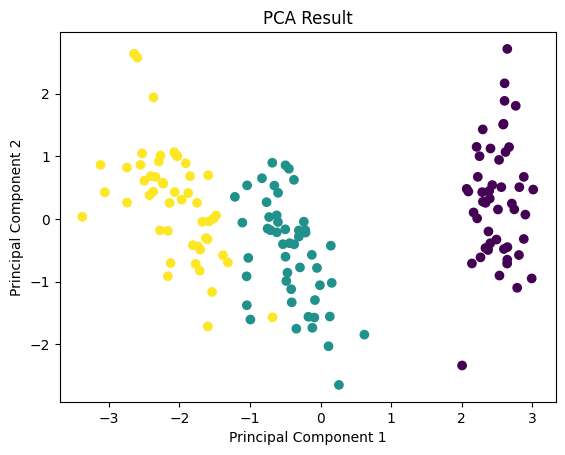

In [21]:
X_reduced, eigenvalues, eigenvectors = pca(X_std, n_components=2)

print("Reduced Data Shape:", X_reduced.shape)
print("Top 2 Eigenvalues:", eigenvalues[:2])

plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_numeric, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.show()